---

##  mplfinance: initial testing of styles and plot customization

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
pd.__version__  # for the record

'0.24.2'

In [3]:
# plots outside the notebook:
#%matplotlib qt     
# plots within the notebook:
%matplotlib inline

---

### Let's read in some daily data for the S&P 500 from November of 2019 

In [4]:
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-26,3134.85,3142.69,3131.00,3140.52,986041660
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


---
## Importing mplfinance

In [5]:
import mplfinance as mpf

---
### Plotting open,high,low,close data is as simple as calling `mpf.plot()` on the dataframe

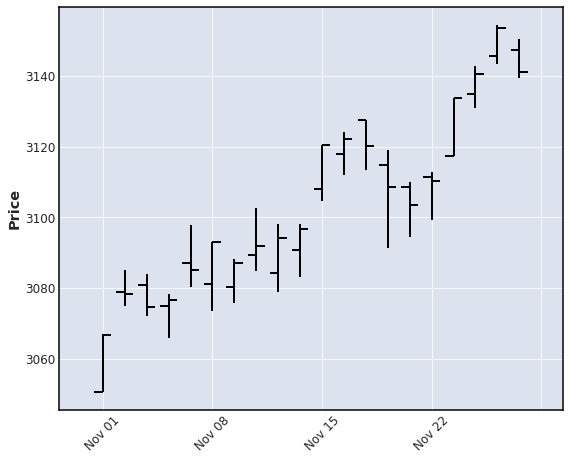

In [6]:
f = mpf.plot(daily)  # the default plot type is 'ohlc'
# f.suptitle('Title Here')
# print('type(f)=',type(f))
# print('id(f)=',id(f))
# import matplotlib.pyplot as plt
# cf = plt.gcf()
# print('type(cf)=',type(cf))
# print('id(cf)=',id(cf))
# f.show()

---

### The default plot type, as you can see above, is `'ohlc'`
  
### Other plot types can be specified with the keyword argument `type`,<br> for example, `type='candle'` or `type='line'`


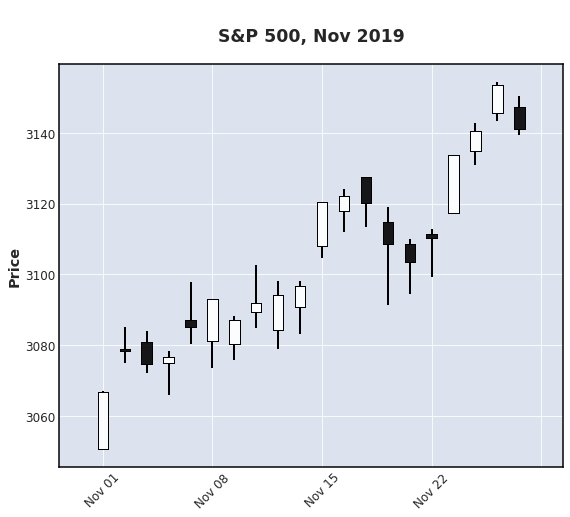

In [7]:
mpf.plot(daily,type='candle',title='\nS&P 500, Nov 2019') # we can plot candlesticks also

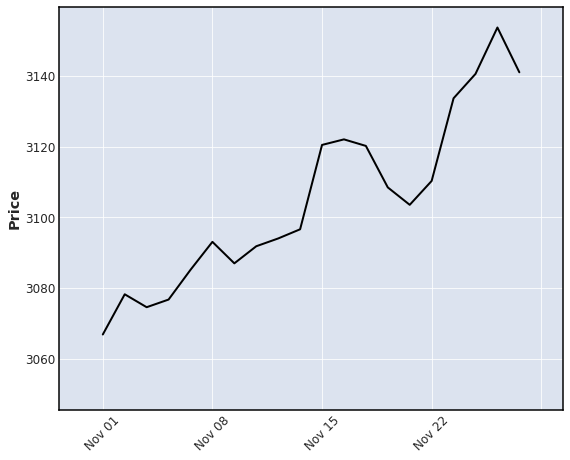

In [8]:
mpf.plot(daily,type='line')

---
## We can also plot moving averages with the `mav` keyword
### &nbsp;&nbsp;&nbsp; - use an integer for a single moving average 
### &nbsp;&nbsp;&nbsp; - use a tuple or list of integers for multiple moving averages

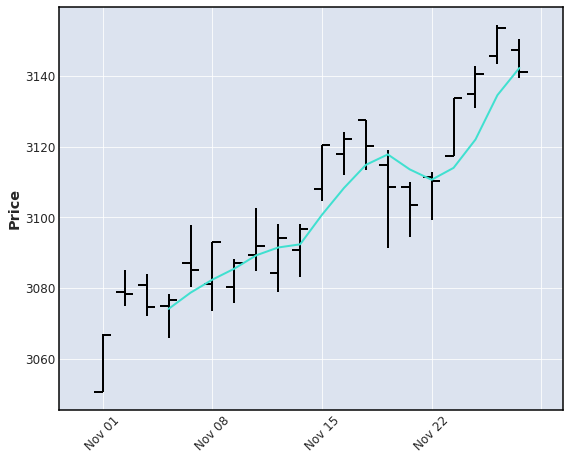

In [9]:
mpf.plot(daily,type='ohlc',mav=4)

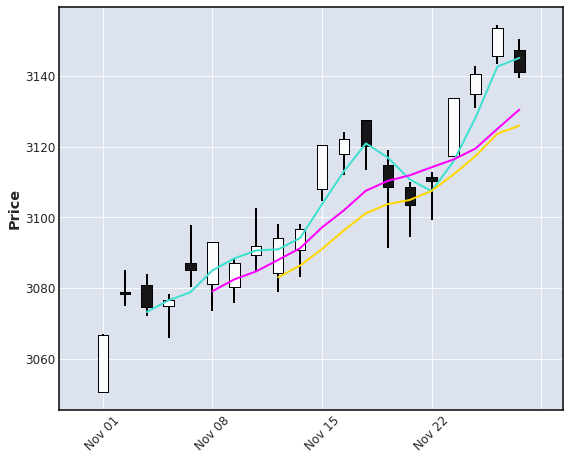

In [10]:
mpf.plot(daily,type='candle',mav=(3,6,9))

In [11]:
# from mplfinance._styles import _get_mpfstyle

# style = _get_mpfstyle('classic')

# # import copy
# # mktcolors = copy.deepcopy(style['marketcolors'])
# # mavcolors = copy.deepcopy(style['mavcolors'])

# mktcolors = style['marketcolors']
# mavcolors = style['mavcolors']

# subd = mktcolors['candle']
# subd
# subd.update({'up':'g','down':'r'})
# subd
# #mktcolors.update({'candle':subd,'volume':'#1f77b4'})

In [12]:
s = mpf.make_custom_style(mavcolors=['red','orange','green','blue','purple'])
s = mpf.make_custom_style()
s = mpf.make_custom_style(base_mpf_style='classic')

In [13]:
s.keys()

dict_keys(['style_name', 'base_mpl_style', 'marketcolors', 'mavcolors', 'y_on_right', 'gridcolor', 'gridstyle', 'facecolor', 'rc', 'base_mpf_style'])

In [14]:
# m = mpf.make_marketcolors(up='k',down='#0095ff',edge='w',wick='w',ohlc='w',volume='#92aace',alpha=1.0)
# m = mpf.make_marketcolors(up='k',down='#0095ff',edge='w',wick='w',ohlc='w',volume='#7a93b8',alpha=1.0)
# s = mpf.make_custom_style(base_mplstyle='dark_background',marketcolors=m,facecolor='k',
#                           gridcolor='gray',gridstyle='--')
# s = mpf.make_custom_style(base_mplstyle='dark_background',marketcolors=m,gridcolor='#999999',gridstyle='--')
# s = mpf.make_custom_style(base_mplstyle='dark_background',facecolor='#0a0a0a',marketcolors=m,
#                           gridcolor='grey',gridstyle='--')

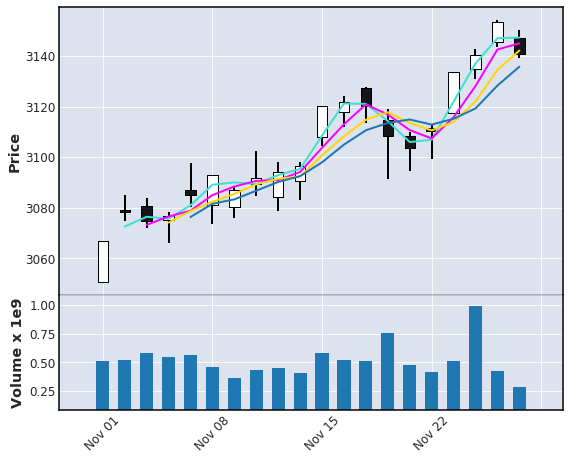

In [15]:
mav=(2,3,4,5,6,7,8)
mav=(2,3,4,5)
mpf.plot(daily,type='candle',mav=mav,volume=True,no_xgaps=True)

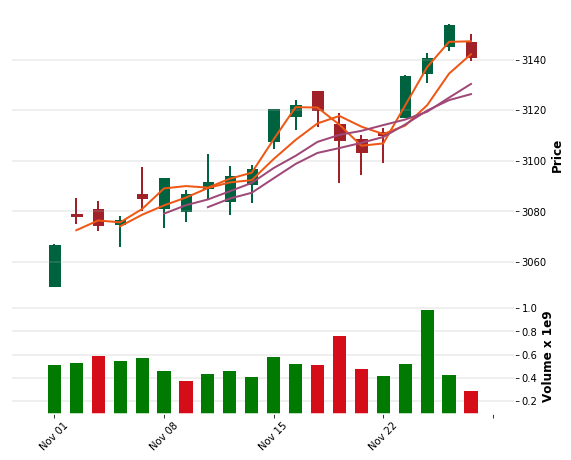

In [16]:
#rcd = {'grid.linewidth' : 1.8 }
s = mpf.make_custom_style(base_mpf_style='schwab',base_mpl_style='default')#,rc=rcd)
s = mpf.make_custom_style(base_mpf_style='schwab',base_mpl_style='fast')#,rc=rcd)
s = 'schwab'
mav=(2,4,6,8)
mpf.plot(daily,type='candle',mav=mav,volume=True,style=s,block=False)

In [17]:
import mplfinance._styledata as sd

In [18]:
dir(sd)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_style_names',
 '_styles',
 '_validate_style',
 'classic',
 'cmd',
 'dark',
 'darktest',
 'default',
 'mike',
 'name',
 'schwab']

In [19]:
[n for n in dir(sd) if not n.startswith('_')]

['classic', 'cmd', 'dark', 'darktest', 'default', 'mike', 'name', 'schwab']

In [20]:
from mplfinance._styledata import *

In [21]:
[n for n in dir() if not n.startswith('_')]

['In',
 'InteractiveShell',
 'Out',
 'classic',
 'cmd',
 'daily',
 'dark',
 'darktest',
 'default',
 'exit',
 'f',
 'get_ipython',
 'mav',
 'mike',
 'mpf',
 'name',
 'pd',
 'quit',
 's',
 'schwab',
 'sd']

In [22]:
_sn = ['dark','mike']

for n in _sn:
    ic = f'import mplfinance._styledata.{n} as {n}'
    print('ic="'+ic+'"')

ic="import mplfinance._styledata.dark as dark"
ic="import mplfinance._styledata.mike as mike"


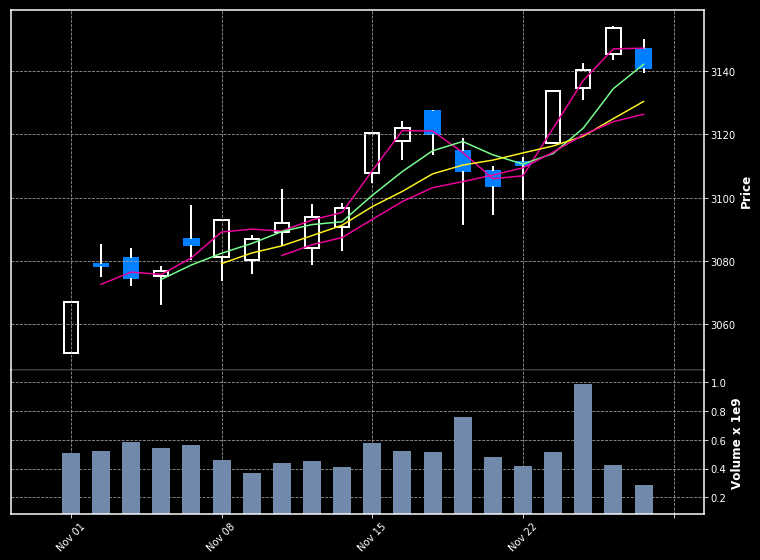

In [23]:
mav=(2,4,6,8)
mpf.plot(daily,type='candle',mav=mav,volume=True,style='mike',figratio=(11,8),figscale=1.25)

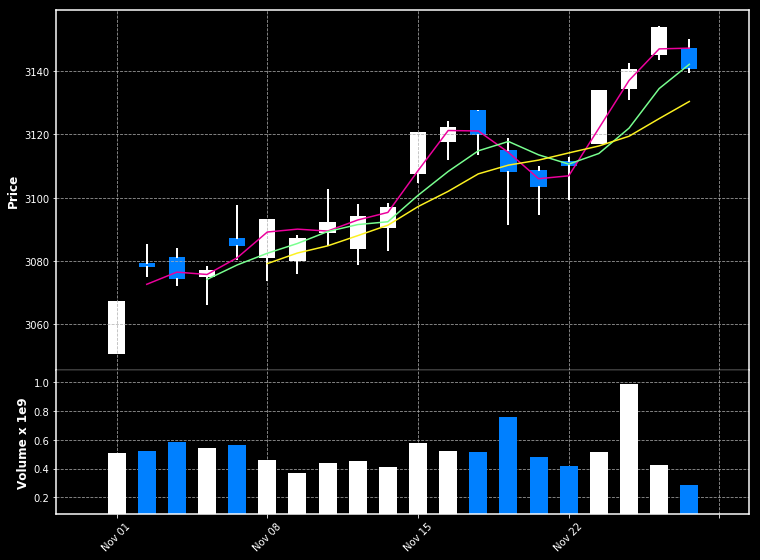

In [24]:
mc = mpf.make_marketcolors(base_style='mike',up='w',volume='i')
st = mpf.make_custom_style(base_mpf_style='mike',marketcolors=mc)
mpf.plot(daily,type='candle',mav=mav[0:3],volume=True,style=st,figratio=(11,8),figscale=1.25)

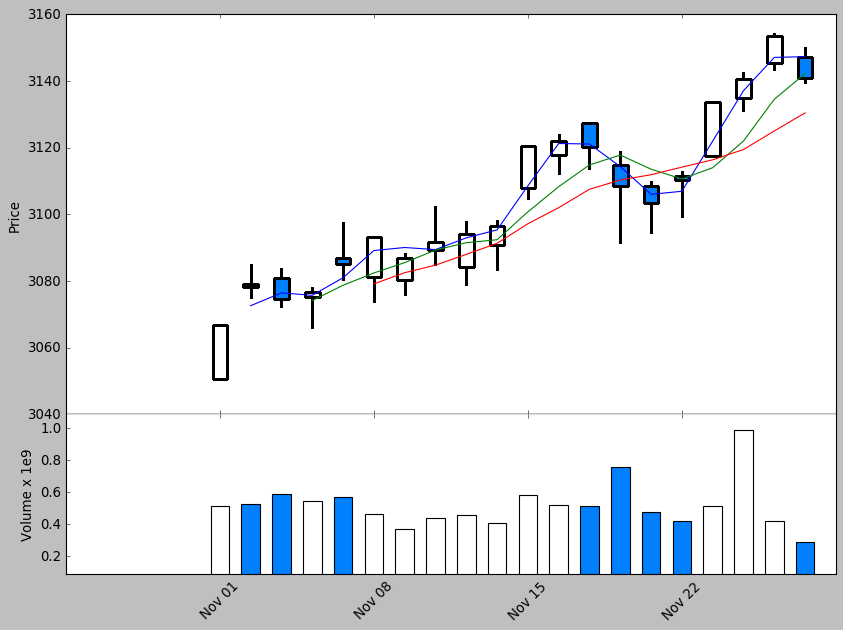

In [25]:
mc = mpf.make_marketcolors(base_style='mike',up='w',volume='i',edge='k',wick='k')
#st = mpf.make_custom_style(base_mplstyle='classic',base_mpf_style='mike',marketcolors=mc)
st = mpf.make_custom_style(base_mpl_style='classic',marketcolors=mc)
mpf.plot(daily,type='candle',mav=mav[0:3],volume=True,style=st,figratio=(11,8),figscale=1.25)

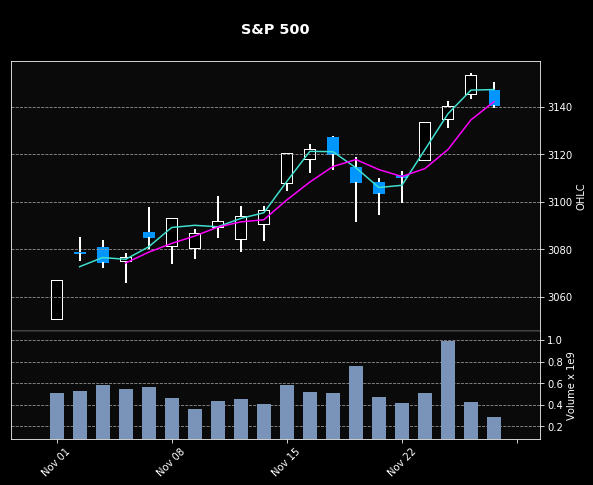

In [26]:
mpf.plot(daily,type='candle',mav=(2,4),volume=True,no_xgaps=True,
         style='darktest',figratio=(7,5),figscale=1.5,ylabel='OHLC',title='\nS&P 500')

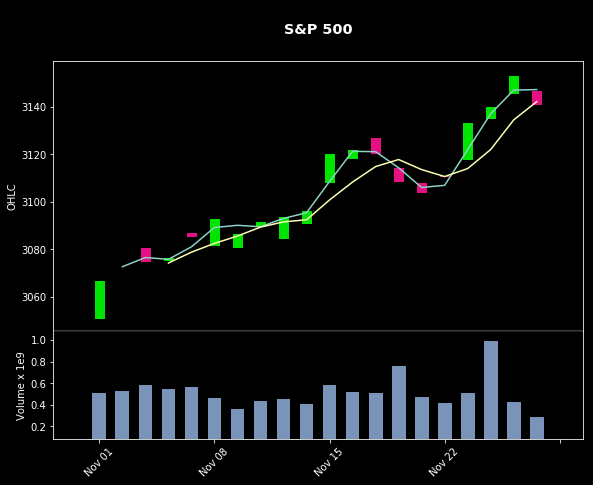

In [27]:
m = mpf.make_marketcolors(up='lime',down='deeppink',ohlc='inherit',volume='#7a93b8')
st = mpf.make_custom_style(base_mpl_style='dark_background',marketcolors=m)
mpf.plot(daily,type='candle',mav=(2,4),volume=True,no_xgaps=True,
         style=st,figratio=(7,5),figscale=1.5,ylabel='OHLC',title='\nS&P 500')

In [28]:
len(daily)
daily.head(2)

20

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


In [29]:
opens  = daily['Open'].values
closes = daily['Close'].values
len(opens)
len(closes)

20

20

In [30]:
c = mpf._utils._updown_colors('g','r',opens,closes,True)
len(c)
#c

20

In [31]:
import math
math.sin(2)

0.9092974268256817

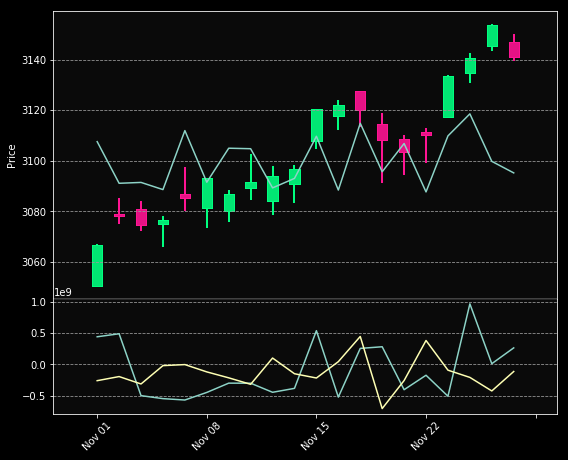

In [32]:
#m = mpf.make_marketcolors(up='lime',down='deeppink',ohlc='inherit',edge='inherit',wick='inherit',volume='cyan')
#m = mpf.make_marketcolors()
#m = mpf.make_marketcolors(up='lightgreen',down='skyblue',wick='i',edge='in',volume='inh')
m = mpf.make_marketcolors(up='springgreen',down='deeppink',wick='i',edge='in',volume='inh') # vcdocodp
# vcolor_per_codprice=[True|False] default = False
#s = mpf.make_custom_style(base_mpf_style='dark',marketcolors=m)
#s = mpf.make_custom_style(marketcolors=m)
rcp = {'ytick.labelright':True,'ytick.right':True,'ytick.labelleft':False,'ytick.left':False}
s = mpf.make_custom_style(base_mpf_style='dark',marketcolors=m,rc=rcp)
y1 = [ v*math.sin(v) for v in daily['Volume'].values]
y2 = [ v*math.cos(v) for v in daily['Volume'].values]
y3 = [ v*(0.00000003*math.cos(v*0.5)) + 3100 for v in daily['Volume'].values]
p = [mpf.make_addplot(y1,panel='lower'),
     mpf.make_addplot(y2,panel='lower'),
     mpf.make_addplot(y3)#,panel='lower')
    ]
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,style=s,addplot=p)
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,addplot=p)
mpf.plot(daily,type='candle',no_xgaps=True,addplot=p,style=s)
#mpf.plot(daily,type='candle',no_xgaps=True,addplot=p,style=s)

In [33]:
import matplotlib as mpl
mpl.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

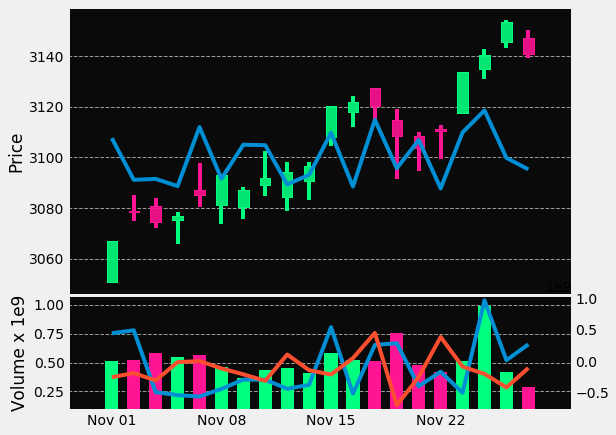

In [34]:
m = mpf.make_marketcolors(up='springgreen',down='deeppink',wick='i',edge='in',volume='inh') # vcdocodp
#m = mpf.make_marketcolors(base_style='classic') # vcdocodp
#s = mpf.make_custom_style(base_mplstyle='grayscale')#,marketcolors=m)#,rc=rcp)
upcolor='darkslategray'
#-upcolor='navy'
#m = mpf.make_marketcolors(up=upcolor,down='red',wick='i',edge='in',volume='inh')
s = mpf.make_custom_style(base_mpl_style='fivethirtyeight',marketcolors=m,base_mpf_style='darktest')#,rc=rcp)
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,style=s,addplot=p)
#mpf.plot(daily,type='candle',volume=True,no_xgaps=True,addplot=p)
mpf.plot(daily,type='candle',volume=True,style=s,addplot=p[0:3])

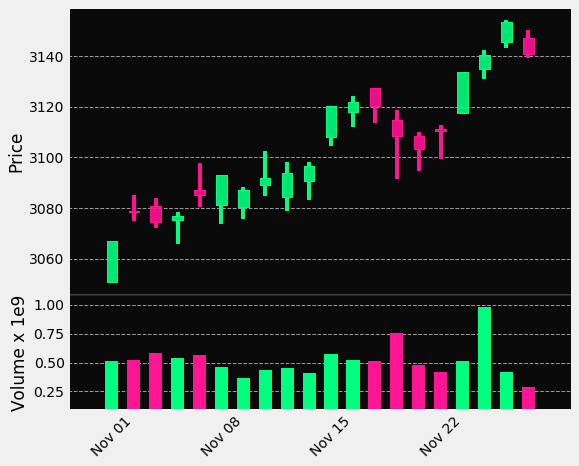

In [35]:
mpf.plot(daily,type='candle',volume=True,style=s)#,addplot=p[0])

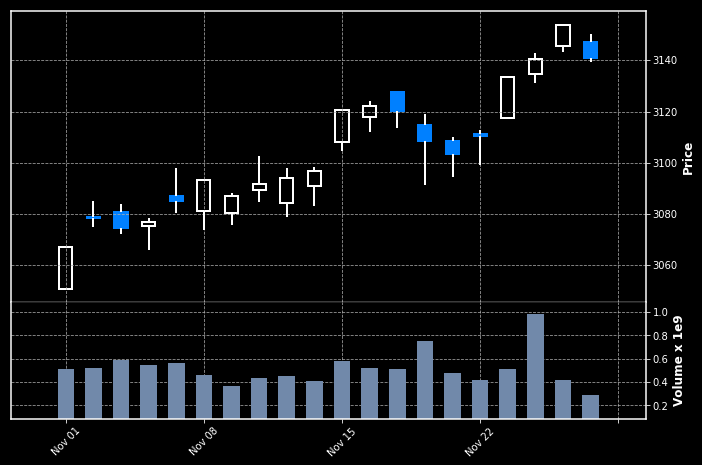

In [36]:
mpf.plot(daily,type='candle',volume=True,style='mike',figratio=(14,9),figscale=0.9)

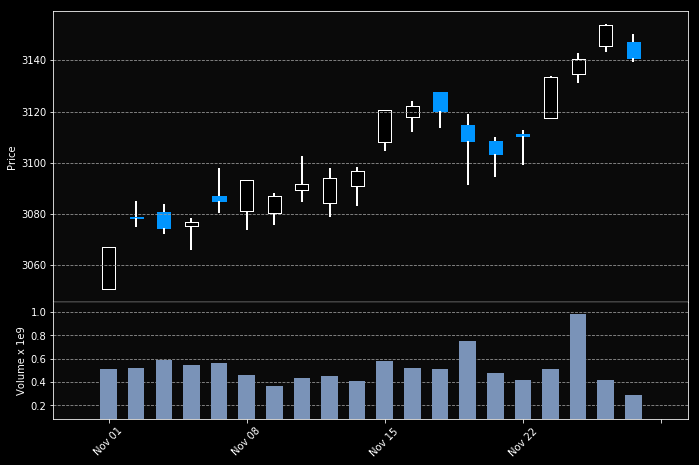

In [37]:
mpf.plot(daily,type='candle',volume=True,style='dark',figratio=(14,9),figscale=0.9)

In [38]:
import mplfinance._styledata as sd

In [39]:
type(sd)
dir(sd)

module

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_style_names',
 '_styles',
 '_validate_style',
 'classic',
 'cmd',
 'dark',
 'darktest',
 'default',
 'mike',
 'name',
 'schwab']

In [40]:
[s for s in dir(sd) if not s.startswith('_')]

['classic', 'cmd', 'dark', 'darktest', 'default', 'mike', 'name', 'schwab']

In [41]:
sd.mike
type(sd.mike.style)

<module 'mplfinance._styledata.mike' from '/home/dino/code/mplfinance/src/mplfinance/_styledata/mike.py'>

dict

In [42]:
mpf.available_styles()

['classic', 'dark', 'darktest', 'default', 'mike', 'schwab']

In [43]:
import importlib

In [44]:
import mplfinance._styledata as sdefs
type(sdefs)
dir(sdefs)

module

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_style_names',
 '_styles',
 '_validate_style',
 'classic',
 'cmd',
 'dark',
 'darktest',
 'default',
 'mike',
 'name',
 'schwab']

In [45]:
s = 'sdefs.classic'
classic = importlib.reload(eval(s))

In [46]:
type(classic)

module

In [47]:
classic.style

{'style_name': 'classical',
 'base_mpl_style': 'seaborn-darkgrid',
 'marketcolors': {'candle': {'up': 'w', 'down': 'k'},
  'edge': {'up': 'k', 'down': 'k'},
  'wick': {'up': 'k', 'down': 'k'},
  'ohlc': {'up': 'k', 'down': 'k'},
  'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
  'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
  'vcdopcod': False,
  'alpha': 0.9},
 'mavcolors': ['#40e0d0',
  '#ff00ff',
  '#ffd700',
  '#1f77b4',
  '#ff7f0e',
  '#2ca02c',
  '#e377c2'],
 'y_on_right': False,
 'gridcolor': None,
 'gridstyle': None,
 'facecolor': '#DCE3EF',
 'rc': [('axes.edgecolor', 'black'),
  ('axes.linewidth', 1.5),
  ('axes.labelsize', 'large'),
  ('axes.labelweight', 'semibold'),
  ('lines.linewidth', 2.0),
  ('font.weight', 'medium'),
  ('font.size', 12.0)],
 'base_mpf_style': 'classic'}

In [48]:
s = mpf.make_custom_style(base_mpf_style='classic')
s

{'style_name': 'classical',
 'base_mpl_style': 'seaborn-darkgrid',
 'marketcolors': {'candle': {'up': 'w', 'down': 'k'},
  'edge': {'up': 'k', 'down': 'k'},
  'wick': {'up': 'k', 'down': 'k'},
  'ohlc': {'up': 'k', 'down': 'k'},
  'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
  'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
  'vcdopcod': False,
  'alpha': 0.9},
 'mavcolors': ['#40e0d0',
  '#ff00ff',
  '#ffd700',
  '#1f77b4',
  '#ff7f0e',
  '#2ca02c',
  '#e377c2'],
 'y_on_right': False,
 'gridcolor': None,
 'gridstyle': None,
 'facecolor': '#DCE3EF',
 'rc': [('axes.edgecolor', 'black'),
  ('axes.linewidth', 1.5),
  ('axes.labelsize', 'large'),
  ('axes.labelweight', 'semibold'),
  ('lines.linewidth', 2.0),
  ('font.weight', 'medium'),
  ('font.size', 12.0)],
 'base_mpf_style': 'classic'}

In [49]:
for key in classic.style.keys():
    print(key,':\n classic=',classic.style[key],'\n s......=',s[key],'\n')

style_name :
 classic= classical 
 s......= classical 

base_mpl_style :
 classic= seaborn-darkgrid 
 s......= seaborn-darkgrid 

marketcolors :
 classic= {'candle': {'up': 'w', 'down': 'k'}, 'edge': {'up': 'k', 'down': 'k'}, 'wick': {'up': 'k', 'down': 'k'}, 'ohlc': {'up': 'k', 'down': 'k'}, 'volume': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcdopcod': False, 'alpha': 0.9} 
 s......= {'candle': {'up': 'w', 'down': 'k'}, 'edge': {'up': 'k', 'down': 'k'}, 'wick': {'up': 'k', 'down': 'k'}, 'ohlc': {'up': 'k', 'down': 'k'}, 'volume': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcdopcod': False, 'alpha': 0.9} 

mavcolors :
 classic= ['#40e0d0', '#ff00ff', '#ffd700', '#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2'] 
 s......= ['#40e0d0', '#ff00ff', '#ffd700', '#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2'] 

y_on_right :
 classic= False 
 s......= False 

gridcolor :
 classic= None 
 s......= None 

gridstyle :


In [50]:
s == classic.style

True

In [51]:
for key in s.keys():
    print(key,':\n classic=',classic.style[key],'\n s......=',s[key],'\n')

style_name :
 classic= classical 
 s......= classical 

base_mpl_style :
 classic= seaborn-darkgrid 
 s......= seaborn-darkgrid 

marketcolors :
 classic= {'candle': {'up': 'w', 'down': 'k'}, 'edge': {'up': 'k', 'down': 'k'}, 'wick': {'up': 'k', 'down': 'k'}, 'ohlc': {'up': 'k', 'down': 'k'}, 'volume': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcdopcod': False, 'alpha': 0.9} 
 s......= {'candle': {'up': 'w', 'down': 'k'}, 'edge': {'up': 'k', 'down': 'k'}, 'wick': {'up': 'k', 'down': 'k'}, 'ohlc': {'up': 'k', 'down': 'k'}, 'volume': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'}, 'vcdopcod': False, 'alpha': 0.9} 

mavcolors :
 classic= ['#40e0d0', '#ff00ff', '#ffd700', '#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2'] 
 s......= ['#40e0d0', '#ff00ff', '#ffd700', '#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2'] 

y_on_right :
 classic= False 
 s......= False 

gridcolor :
 classic= None 
 s......= None 

gridstyle :


In [52]:
s['base_mpf_style']

'classic'

In [53]:
classic.style['base_mpf_style']

'classic'

In [54]:
m = mpf.make_marketcolors()

In [55]:
m

{'candle': {'up': 'w', 'down': 'k'},
 'edge': {'up': 'k', 'down': 'k'},
 'wick': {'up': 'k', 'down': 'k'},
 'ohlc': {'up': 'k', 'down': 'k'},
 'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
 'vcdopcod': False,
 'alpha': 0.9}

In [56]:
# print('---')
# m = mpf.make_marketcolors(base_style='classic',down='limegreen',
#                           ohlc='w',volume='k',wick='g')
# m
print('---')
m = mpf.make_marketcolors(base_style='dark',down='limegreen')#, volume='k',wick='g')
m

---


{'candle': {'up': 'k', 'down': 'limegreen'},
 'edge': {'up': 'w', 'down': '#0095ff'},
 'wick': {'up': 'w', 'down': 'w'},
 'ohlc': {'up': 'w', 'down': 'w'},
 'volume': {'up': '#7a93b8', 'down': '#7a93b8'},
 'vcdopcod': False,
 'alpha': 1.0,
 'down': 'limegreen'}

In [57]:
from mplfinance._styles import _get_mpfstyle
style = _get_mpfstyle('classic')
style['marketcolors']

{'candle': {'up': 'w', 'down': 'k'},
 'edge': {'up': 'k', 'down': 'k'},
 'wick': {'up': 'k', 'down': 'k'},
 'ohlc': {'up': 'k', 'down': 'k'},
 'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
 'vcdopcod': False,
 'alpha': 0.9}

In [58]:
style = _get_mpfstyle('dark')
style['marketcolors']

{'candle': {'up': 'k', 'down': '#0095ff'},
 'edge': {'up': 'w', 'down': '#0095ff'},
 'wick': {'up': 'w', 'down': 'w'},
 'ohlc': {'up': 'w', 'down': 'w'},
 'volume': {'up': '#7a93b8', 'down': '#7a93b8'},
 'vcdopcod': False,
 'alpha': 1.0}

In [59]:
from mplfinance._styledata import classic

In [60]:
dir(classic)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'style']

In [61]:
import copy
s = copy.deepcopy(classic.style)
del s['marketcolors']['wick']
#s

In [62]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-62-a6774c8535dd>, line 1)

In [ ]:
intraday = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

In [ ]:
iday = intraday.loc['2019-11-06 15:00':'2019-11-06 16:00',:]
mpf.plot(iday,type='candle',mav=(7,12))

In [ ]:
iday = intraday.loc['2019-11-05':'2019-11-06',:]
mpf.plot(iday,type='candle')

In [ ]:
mpf.plot(iday,type='candle',no_xgaps=False)

In [ ]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

In [ ]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40),figscale=0.75)

In [ ]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40))